In [66]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
import scipy.integrate as integ
from scipy.fft import fft,ifft

In [3]:
t0  = 0
tf = 4000
dt = 0.1

dx = 0.1
xmax = 8

#seperation = 6
#nmeasure = 1000




In [64]:
ts = np.arange(t0,tf+dt,dt,dtype = np.complex64)
xs = np.arange(-xmax,xmax+dx,dx,dtype = np.complex64)

nt = np.size(ts)
N = np.size(xs)

ks = np.linspace(-N/2,N/2-1,N,dtype = np.complex64)*(2*np.pi)/(N*dx)
w = 1

Vx =  0.5*w**2*xs**2
T = 0.5*ks**2

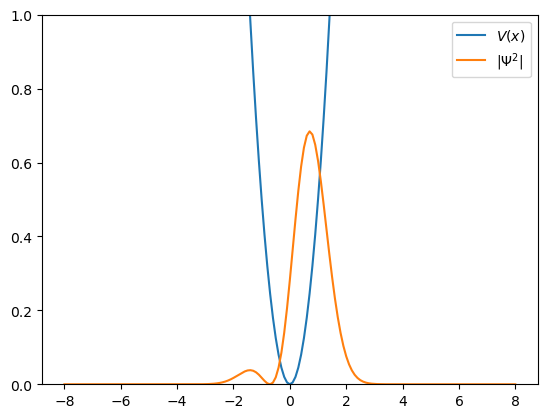

In [68]:
plt.plot(xs,Vx,label = r'$V(x)$')
psi_0 = 1/np.sqrt(2)*((w/np.pi)**(1/4))*((np.exp(-xs**2/2))+np.sqrt(2)*xs*np.exp(-xs**2/2))
plt.plot(xs,psi_0**2,label = r'$\vert \Psi^2\vert$')
plt.ylim(0,1)
plt.legend()

In [71]:
def split_step_propagate(V,T,delta_t,psi):
    phi = fft(psi)
    phi*=np.exp(-1j*T*delta_t/2)
    psi = ifft(phi)
    psi*=np.exp(-1j*V*delta_t)
    phi = fft(psi)
    phi*= np.exp(-1j*T*delta_t/2)
    psi = ifft(phi)
    return psi
print(split_step_propagate(Vx,T,dt,psi_0))
print(integ.trapezoid(np.abs(split_step_propagate(Vx,T,dt,psi_0))**2,xs))
t = t0
psi = psi_0
while t<tf:
    t+=dt
    psi = split_step_propagate(Vx,T,dt,psi)

[-3.52578200e-02-0.03715722j -3.43885683e-02-0.0356693j
 -3.33374590e-02-0.03431195j -3.21251191e-02-0.03277335j
 -3.05266976e-02-0.03142559j -2.90855914e-02-0.03008977j
 -2.72597354e-02-0.02839618j -2.49728411e-02-0.0270699j
 -2.30012927e-02-0.02599104j -2.11809259e-02-0.02439326j
 -1.87625773e-02-0.02235379j -1.55983111e-02-0.02057474j
 -1.21673597e-02-0.01949973j -9.01203323e-03-0.01908697j
 -6.43626275e-03-0.01906583j -4.52674925e-03-0.01918204j
 -3.26915341e-03-0.01928738j -2.63103493e-03-0.01933385j
 -2.59496714e-03-0.01934444j -3.16207460e-03-0.01938993j
 -4.34406660e-03-0.01957603j -6.15189690e-03-0.02003816j
 -8.58378876e-03-0.02093855j -1.16133839e-02-0.02246385j
 -1.51780145e-02-0.02482035j -1.91680007e-02-0.02822754j
 -2.34164447e-02-0.03290751j -2.76916139e-02-0.03907122j
 -3.16922702e-02-0.04690162j -3.50473374e-02-0.05653341j
 -3.73209268e-02-0.06803177j -3.80238257e-02-0.08137j
 -3.66317965e-02-0.09640898j -3.26108597e-02-0.11287984j
 -2.54490357e-02-0.13037294j -1.4692